<a href="https://colab.research.google.com/github/AmrithavarshiniR/OpenAITraining/blob/main/Hackathon/ML_Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's continue from where we last left. In this lab, we will be cleaning our data to see how our models improve.

Let's quickly get our data, and repeat the steps we performed in the last lab.

In [14]:
# read the data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# look at the data
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data['id'] = data.apply(lambda row: row.name + 1, axis=1)

In [17]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
# let's work with fewer columns for simplicity
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

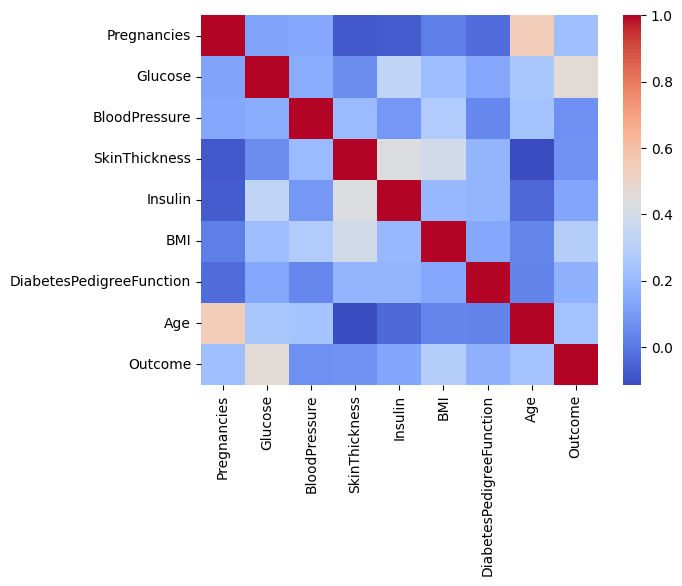

In [19]:
import seaborn as sns
inp_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
cr = data[inp_cols].corr()
sns.heatmap(cr, cmap='coolwarm')

<Axes: >

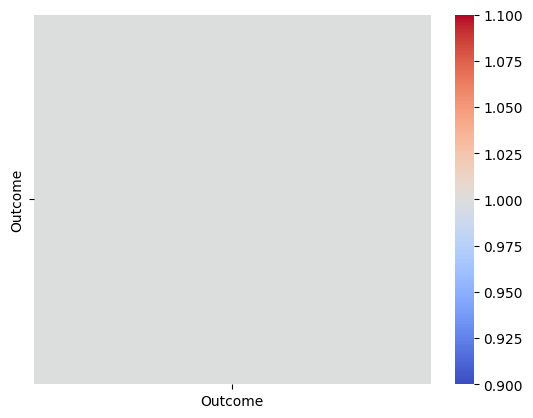

In [55]:
import copy
y = copy.copy(data)
y = y.loc[: , ['Outcome']]
y.head()

cr = y.corr()

sns.heatmap(cr, cmap='coolwarm')

In [56]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


This dataset doesn't have any null values, but let's go through the check and steps anyway.

In [57]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Get the label and features out

In [58]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [59]:
y.head(20)

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [34]:
x = data.iloc[:, :-1]

In [60]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [61]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Let's also get the train-test divide done

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                      random_state=42,
                                      test_size=0.2)

One of the ways to normalize the data is Z-Scoring. The formulae is:


normalized data = (data-mean)/standard_deviation

We can get the statistics from the dataset:

In [63]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.742671,3.313264,0.000,1.0000,3.0000,6.00000,17.00
Glucose,614.0,120.855049,32.035057,0.000,100.0000,117.0000,139.00000,199.00
BloodPressure,614.0,69.415309,18.512599,0.000,64.0000,72.0000,80.00000,122.00
SkinThickness,614.0,20.399023,15.433974,0.000,0.0000,23.0000,32.00000,63.00
Insulin,614.0,81.438111,116.234835,0.000,0.0000,42.5000,129.75000,846.00
BMI,614.0,31.983388,7.740625,0.000,27.1000,32.0000,36.37500,67.10
DiabetesPedigreeFunction,614.0,0.469168,0.336847,0.078,0.2415,0.3725,0.61375,2.42
Age,614.0,32.907166,11.503437,21.000,24.0000,29.0000,40.00000,81.00


Question- why did we transpose the statistics?

In [64]:
mu = stats['mean']
sigma = stats['std']
norm_xtrain = (xtrain-mu)/sigma

In [65]:
norm_xtest = (xtest-mu)/sigma

In [66]:
norm_xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681301,-0.713439,-0.616624,0.816444,0.933988,0.260523,-0.116278,0.877376
324,-0.525968,-0.276417,0.301670,0.751652,-0.700634,0.480144,-0.953454,-1.035096
624,-0.525968,-0.401281,-0.292520,-1.321696,-0.700634,-0.152880,-0.923767,-1.035096
690,1.284935,-0.432496,0.571756,-1.321696,-0.700634,-0.953849,1.148392,0.095001
473,0.983118,0.472762,1.111929,-1.321696,-0.700634,-0.269150,-0.769394,1.485889
...,...,...,...,...,...,...,...,...
355,1.586752,1.378020,1.003894,-1.321696,-0.700634,-0.204556,-0.496272,1.398959
534,-0.827785,-1.368971,-0.724658,0.622068,-0.218851,0.170091,2.321032,-0.774305
344,1.284935,-0.807086,0.139618,-1.321696,-0.700634,0.622251,0.047001,2.094403
296,-0.525968,0.784920,0.031583,1.140405,2.396544,-0.514608,-0.392368,-0.339652


Observe how we calculate mu (mean) and sigma (standard deviation) from only training data, and then applied the same rules to testing data.

One advantage of Z-Scoring method (besides being able to normalize) is outlier detection. Let's first use the box plot to visualize any outliers.

Outliers would be the values greater than 3, and less than -3.

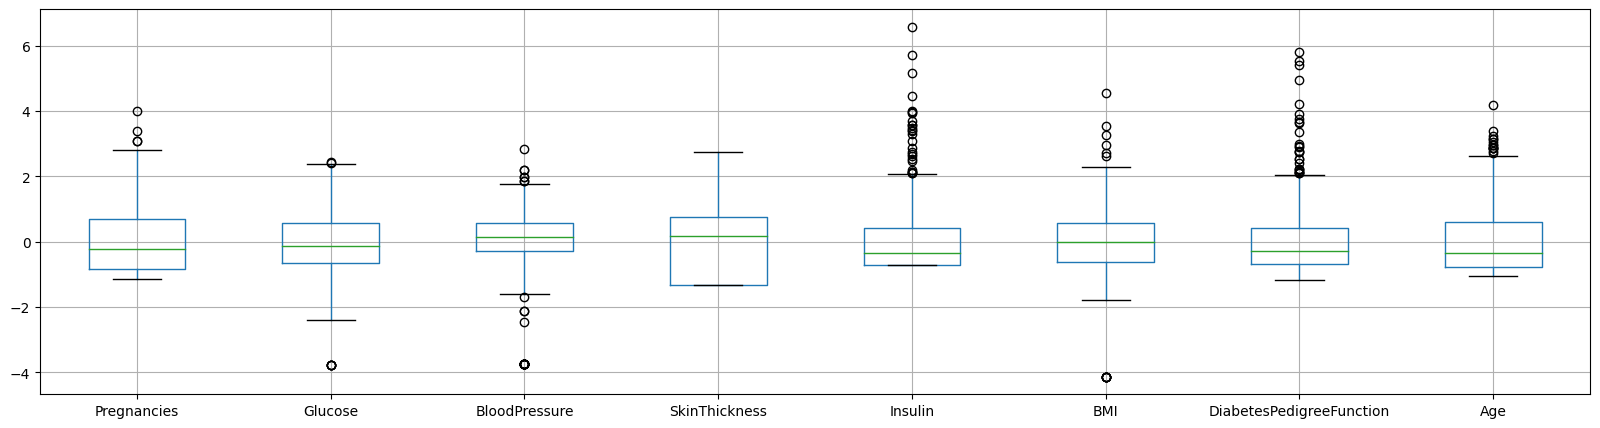

In [67]:
plt.figure(figsize=(20,5))
norm_xtrain.boxplot(fontsize=10)
plt.show()

Question- Are there any outliers?

Now, let's deal with the outliers. There are two solutions to managing them:



1.   Replace them- with mean, median, mode or a custom value
2.   Remove them- either row wise or column wise



Let's have a look at the outliers.

In [76]:
# total outliers in every column
(norm_xtrain>7).sum() + (norm_xtrain<-3).sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,24
SkinThickness,0
Insulin,0
BMI,7
DiabetesPedigreeFunction,0
Age,0


In [80]:
#let's have a look at what outliers looks like
norm_xtrain[(norm_xtrain['DiabetesPedigreeFunction']>7) |
            (norm_xtrain['DiabetesPedigreeFunction']<-3)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


Now that we have seen some outliers, let's remove them.

In [82]:
idx_to_remove = []
for col in norm_xtrain.columns:
  idx = norm_xtrain[(norm_xtrain[col]>7) |
            (norm_xtrain[col]<-3)].index
  idx_to_remove.extend(idx)
print("These ids are outliers: ",idx_to_remove)


These ids are outliers:  [182, 342, 75, 349, 502, 60, 535, 357, 703, 619, 266, 643, 15, 589, 453, 426, 332, 522, 533, 261, 172, 430, 222, 601, 697, 347, 269, 484, 435, 60, 145, 426, 9, 522, 371, 684]


In [83]:
len(idx_to_remove)

36

In [84]:
len(norm_xtrain), len(ytrain)

(614, 614)

In [85]:
len(norm_xtrain), len(ytrain)

(614, 614)

In [86]:
ytrain[:20]

,Outcome
60,0
618,1
346,0
294,0
231,1
340,0
535,1
306,1
718,0
90,0


Now let's perform some machine learning to see if anything changes.

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [88]:
# HPs -> factors that change the model outcome during training or inference
all_algos = {
    "logisitc regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vectors with Linear Kernel": SVC(kernel='linear'),
    "Support Vectors with RBF kernel": SVC(kernel='rbf'),
    "Linear Support Vectors": LinearSVC(),
    "Decision Tree50": DecisionTreeClassifier(max_depth=50),
    "Decision Tree75": DecisionTreeClassifier(max_depth=75),
    "Decision Tree25": DecisionTreeClassifier(max_depth=25),
    "Decision Tree125": DecisionTreeClassifier(max_depth=125),
    "Decision Tree250": DecisionTreeClassifier(max_depth=250),
    "Neighbors": KNeighborsClassifier(),
    "Random Forest100": RandomForestClassifier(),
    "Random Forest50": RandomForestClassifier(n_estimators=50),
    "Random Forest500": RandomForestClassifier(n_estimators=500),
    "Random Forest250": RandomForestClassifier(n_estimators=250)
}

In [89]:
ytrain

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [90]:
from sklearn.metrics import f1_score
all_acc = []
all_f1_score = []
best_acc = 0.0
best_f1_score = 0.0
best_model_by_acc = ""
best_model_by_f1 = ""
for algoname, algo in all_algos.items():
  print('*********')
  print('Beginning to train ', algoname, ' model')
  algo.fit(norm_xtrain,ytrain)
  predictions = algo.predict(norm_xtest)
  acc_score = algo.score(norm_xtest, ytest)
  f1 = f1_score(predictions, ytest, average='binary')
  all_acc.append(acc_score)
  all_f1_score.append(f1)
  print('Model Acc Score = ', acc_score*100,'%', end=" ")
  print(', Model F1 Score = ', f1)
  if acc_score > best_acc:
    best_acc = acc_score
    best_model_by_acc = algoname
  if f1 > best_f1_score:
    best_f1_score = f1
    best_model_by_f1 = algoname


*********
Beginning to train  logisitc regression  model
Model Acc Score =  75.32467532467533 % , Model F1 Score =  0.6607142857142858
*********
Beginning to train  Naive Bayes  model
Model Acc Score =  76.62337662337663 % , Model F1 Score =  0.6842105263157895
*********
Beginning to train  Support Vectors with Linear Kernel  model
Model Acc Score =  75.97402597402598 % , Model F1 Score =  0.6605504587155963
*********
Beginning to train  Support Vectors with RBF kernel  model


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model Acc Score =  73.37662337662337 % , Model F1 Score =  0.6019417475728155
*********
Beginning to train  Linear Support Vectors  model
Model Acc Score =  75.32467532467533 % , Model F1 Score =  0.6607142857142858
*********
Beginning to train  Decision Tree50  model
Model Acc Score =  76.62337662337663 % , Model F1 Score =  0.6949152542372882
*********
Beginning to train  Decision Tree75  model
Model Acc Score =  75.97402597402598 % , Model F1 Score =  0.6837606837606838
*********
Beginning to train  Decision Tree25  model
Model Acc Score =  74.02597402597402 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


% , Model F1 Score =  0.6551724137931035
*********
Beginning to train  Decision Tree125  model
Model Acc Score =  74.02597402597402 % , Model F1 Score =  0.6610169491525425
*********
Beginning to train  Decision Tree250  model
Model Acc Score =  75.97402597402598 % , Model F1 Score =  0.694214876033058
*********
Beginning to train  Neighbors  model


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Acc Score =  69.48051948051948 % , Model F1 Score =  0.5436893203883495
*********
Beginning to train  Random Forest100  model
Model Acc Score =  75.32467532467533 % , Model F1 Score =  0.6545454545454545
*********
Beginning to train  Random Forest50  model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Acc Score =  75.97402597402598 % , Model F1 Score =  0.6725663716814159
*********
Beginning to train  Random Forest500  model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Acc Score =  72.72727272727273 % , Model F1 Score =  0.625
*********
Beginning to train  Random Forest250  model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Acc Score =  74.67532467532467 % , Model F1 Score =  0.6486486486486486


In [91]:
best_model_by_acc

'Naive Bayes'

In [92]:
best_acc

0.7662337662337663

Some of the models should have shown tiny improvements now.

In [93]:
best_model_by_f1

'Decision Tree50'

In [94]:
best_f1_score

0.6949152542372882

Observation- compare results with your peers. Are your results similar? What does this tell you about machine learning behaviour?